In [231]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [232]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.0.1
3.1


# Problem formulation

- Multi scatter plot (check)
- Feature scoring (check)
- Scenario discovery (PRIM) (selecteren juiste box, peeling alfa = default & threshold = 0.8)
- Dimensional stacking (op basis van resultaten ws meer runs nodig)

In [233]:
experiments = pd.read_csv('data/output_data/experiments_2000s_0p.csv')
outcomes = pd.read_csv('data/output_data/outcomes_2000s_0p.csv')

experiments = experiments.drop(columns='Unnamed: 0')
outcomes = outcomes.drop(columns='Unnamed: 0')
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,61,134.348299,1.0,0.373263,278.787589,1.5,0.123904,335.347925,1.0,0.430371,...,0,0,0,0,0,0,0,0,policy 0,dikesnet
1,84,341.482872,1.5,0.250371,132.778759,1.0,0.616244,316.889421,10.0,0.716677,...,0,0,0,0,0,0,0,1,policy 0,dikesnet
2,34,71.842881,1.5,0.674589,174.967160,1.5,0.925791,132.242111,1.5,0.174435,...,0,0,0,0,0,0,0,2,policy 0,dikesnet
3,67,125.701108,1.0,0.958906,264.697525,1.5,0.767267,142.481916,1.5,0.884780,...,0,0,0,0,0,0,0,3,policy 0,dikesnet
4,33,308.716810,1.5,0.801957,225.621011,1.5,0.869416,134.194124,1.5,0.503269,...,0,0,0,0,0,0,0,4,policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,113,286.940809,1.0,0.493206,285.141786,1.0,0.278838,134.553210,1.0,0.910676,...,0,0,0,0,0,0,0,9995,policy 0,dikesnet
9996,31,70.940490,1.5,0.509592,236.017550,10.0,0.474265,79.841809,1.5,0.172862,...,0,0,0,0,0,0,0,9996,policy 0,dikesnet
9997,62,62.268306,10.0,0.614386,249.667026,1.0,0.882948,85.798808,1.5,0.857419,...,0,0,0,0,0,0,0,9997,policy 0,dikesnet
9998,0,149.922446,1.0,0.198596,333.070524,1.0,0.949565,205.179956,10.0,0.320397,...,0,0,0,0,0,0,0,9998,policy 0,dikesnet


In [234]:
outcomes

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,policy
0,1.986207e+09,0,0.0,0.0,1.601045,policy 0
1,2.696877e+09,0,0.0,0.0,1.935567,policy 0
2,1.596509e+09,0,0.0,0.0,3.316908,policy 0
3,1.138063e+08,0,0.0,0.0,0.158625,policy 0
4,3.746615e+08,0,0.0,0.0,0.458994,policy 0
...,...,...,...,...,...,...
9995,9.646801e+08,0,0.0,0.0,1.033147,policy 0
9996,2.651796e+09,0,0.0,0.0,3.500044,policy 0
9997,1.776278e+08,0,0.0,0.0,0.248627,policy 0
9998,2.949368e+09,0,0.0,0.0,2.110726,policy 0


# Multiscatter plot

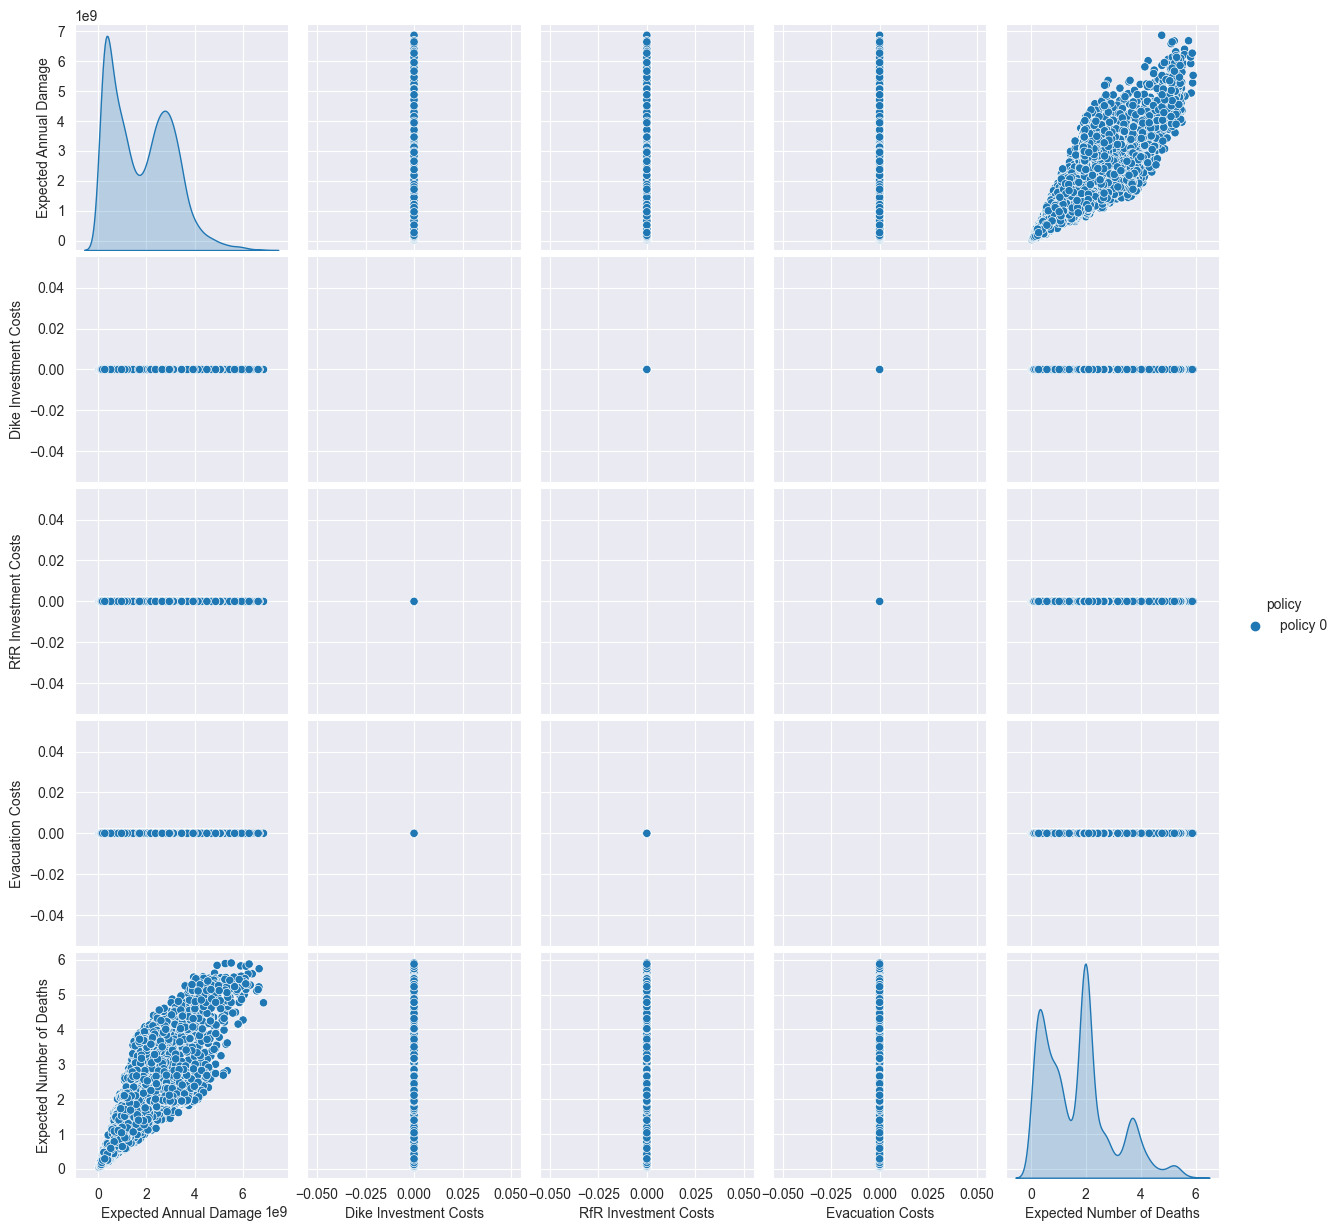

In [235]:
sns.pairplot(outcomes, hue='policy')
plt.show()

Explanation!

# Feature scoring

In [236]:
list_of_uncertainties = ['discount rate 0','discount rate 1','discount rate 2',\
'A.0_ID flood wave shape',
'A.1_Bmax','A.1_pfail','A.1_Brate',\
'A.2_Bmax','A.2_pfail','A.2_Brate',\
'A.3_Bmax','A.3_pfail','A.3_Brate',\
'A.4_Bmax','A.4_pfail','A.4_Brate',\
'A.5_Bmax','A.5_pfail','A.5_Brate',]

uncertainty_experiments = experiments.loc[:,list_of_uncertainties]
uncertainty_experiments

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,A.3_Bmax,A.3_pfail,A.3_Brate,A.4_Bmax,A.4_pfail,A.4_Brate,A.5_Bmax,A.5_pfail,A.5_Brate
0,2.5,3.5,3.5,61,134.348299,0.373263,1.0,278.787589,0.123904,1.5,335.347925,0.430371,1.0,343.041546,0.455040,1.5,86.379513,0.795616,10.0
1,2.5,2.5,4.5,84,341.482872,0.250371,1.5,132.778759,0.616244,1.0,316.889421,0.716677,10.0,83.980764,0.209713,10.0,101.642087,0.109267,10.0
2,4.5,4.5,2.5,34,71.842881,0.674589,1.5,174.967160,0.925791,1.5,132.242111,0.174435,1.5,68.524111,0.683329,1.5,307.822686,0.824561,1.5
3,3.5,4.5,2.5,67,125.701108,0.958906,1.0,264.697525,0.767267,1.5,142.481916,0.884780,1.5,170.756318,0.611634,1.0,340.157470,0.719586,10.0
4,2.5,2.5,4.5,33,308.716810,0.801957,1.5,225.621011,0.869416,1.5,134.194124,0.503269,1.5,172.502588,0.023302,10.0,287.213350,0.906146,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4.5,3.5,3.5,113,286.940809,0.493206,1.0,285.141786,0.278838,1.0,134.553210,0.910676,1.0,197.093835,0.344166,10.0,213.807547,0.050336,1.0
9996,1.5,3.5,1.5,31,70.940490,0.509592,1.5,236.017550,0.474265,10.0,79.841809,0.172862,1.5,92.942975,0.889765,1.0,285.857869,0.149473,10.0
9997,4.5,2.5,4.5,62,62.268306,0.614386,10.0,249.667026,0.882948,1.0,85.798808,0.857419,1.5,92.320591,0.820915,1.5,246.250288,0.712696,1.0
9998,2.5,3.5,2.5,0,149.922446,0.198596,1.0,333.070524,0.949565,1.0,205.179956,0.320397,10.0,84.206875,0.858556,1.0,306.988724,0.187895,10.0


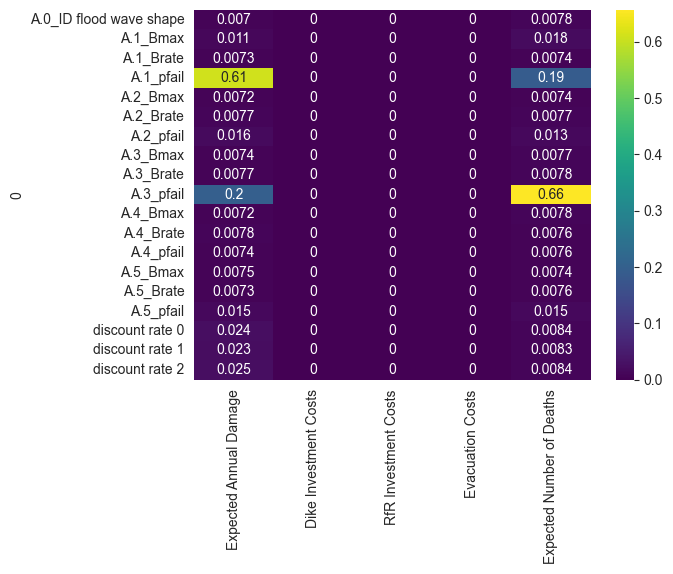

In [237]:
from ema_workbench.analysis import feature_scoring

fs = feature_scoring.get_feature_scores_all(uncertainty_experiments, outcomes.drop(columns='policy'))
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

Explanation!

# PRIM
### Expected Number of Deaths

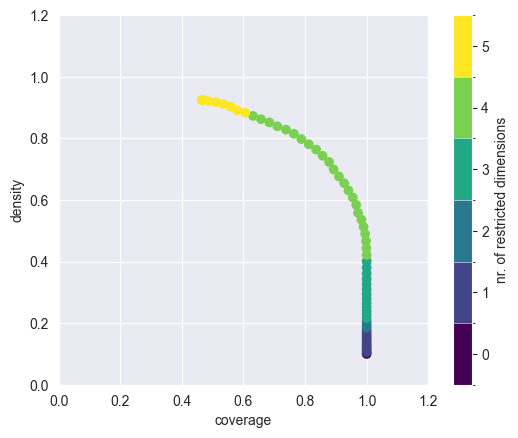

In [238]:
# Expected number of Death (looking at lowest 10%)
from ema_workbench.analysis import prim

x = uncertainty_experiments
y = outcomes['Expected Number of Deaths']< np.percentile(outcomes['Expected Number of Deaths'],10) #

prim_alg = prim.Prim(x, y, threshold=0.8)
# Peal alpha = default & threshold set to same value as used in assignments
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()


coverage     0.893000
density      0.698748
id          40.000000
mass         0.127800
mean         0.698748
res_dim      4.000000
Name: 40, dtype: float64

             box 40                                  
                min       max       qp value qp value
A.3_pfail  0.539888  0.999944  3.070782e-157      NaN
A.1_pfail  0.489055  0.999962  1.600937e-129      NaN
A.5_pfail  0.295670  0.999911   2.711238e-43      NaN
A.2_pfail  0.229114  0.999924   3.722646e-25      NaN



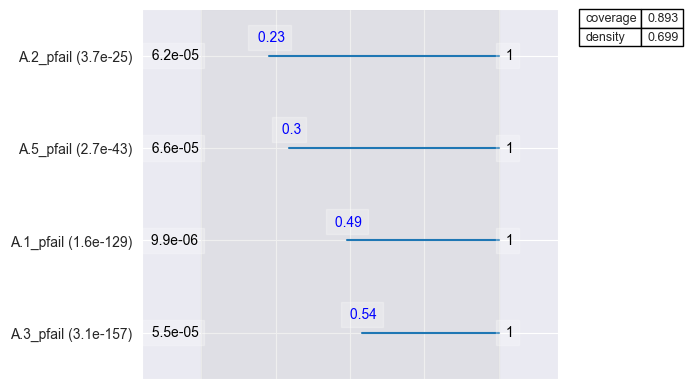

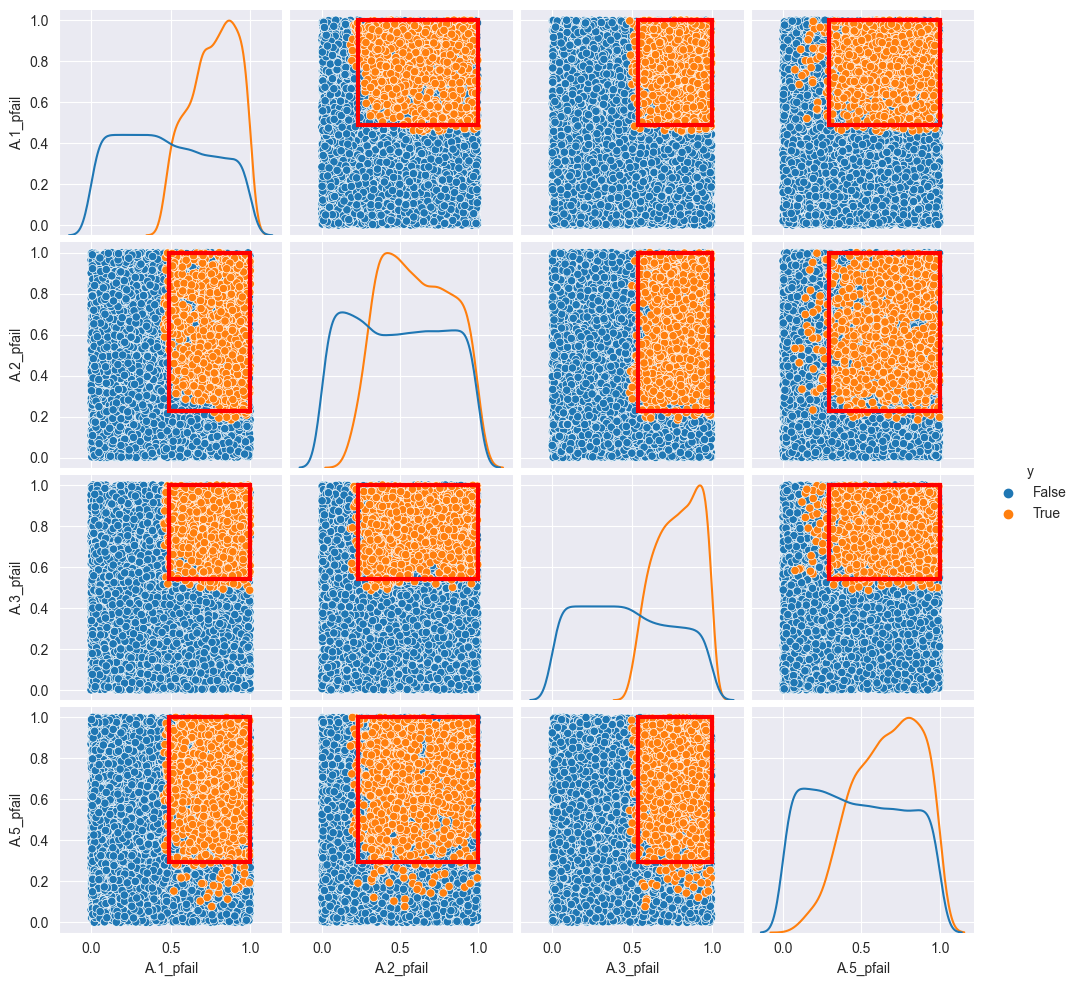

In [239]:
#NOG BEPALEN WELKE BOX WE WILLEN BEKIJKEN!
box1.inspect(40)
box1.inspect(40, style="graph")
box1.show_pairs_scatter(40)
plt.show()

### Expected annual damage

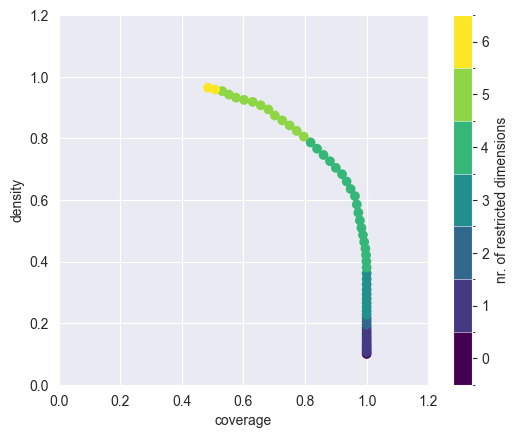

In [240]:
# Expected Expected Annual Damaga (looking at lowest 10%)

x = uncertainty_experiments
y = outcomes['Expected Annual Damage']< np.percentile(outcomes['Expected Annual Damage'],10)


prim_alg = prim.Prim(x, y, threshold=0.8)
# Peal alpha = default & threshold set to same value as used in assignments
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

coverage     0.900000
density      0.704225
id          40.000000
mass         0.127800
mean         0.704225
res_dim      4.000000
Name: 40, dtype: float64

             box 40                                  
                min       max       qp value qp value
A.1_pfail  0.537877  0.999962  1.005206e-158      NaN
A.3_pfail  0.458895  0.999944  4.579208e-115      NaN
A.5_pfail  0.301651  0.999911   8.283888e-49      NaN
A.2_pfail  0.268836  0.999924   3.113533e-34      NaN



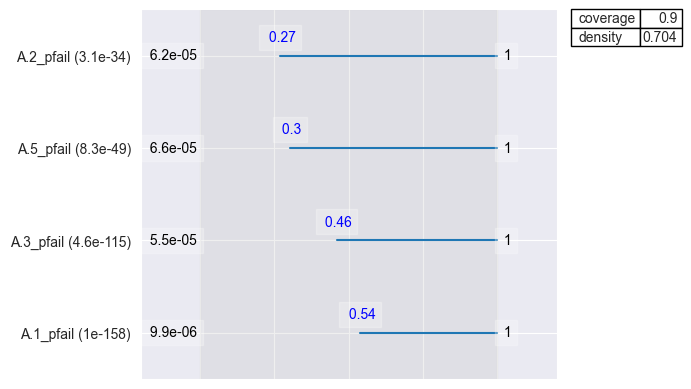

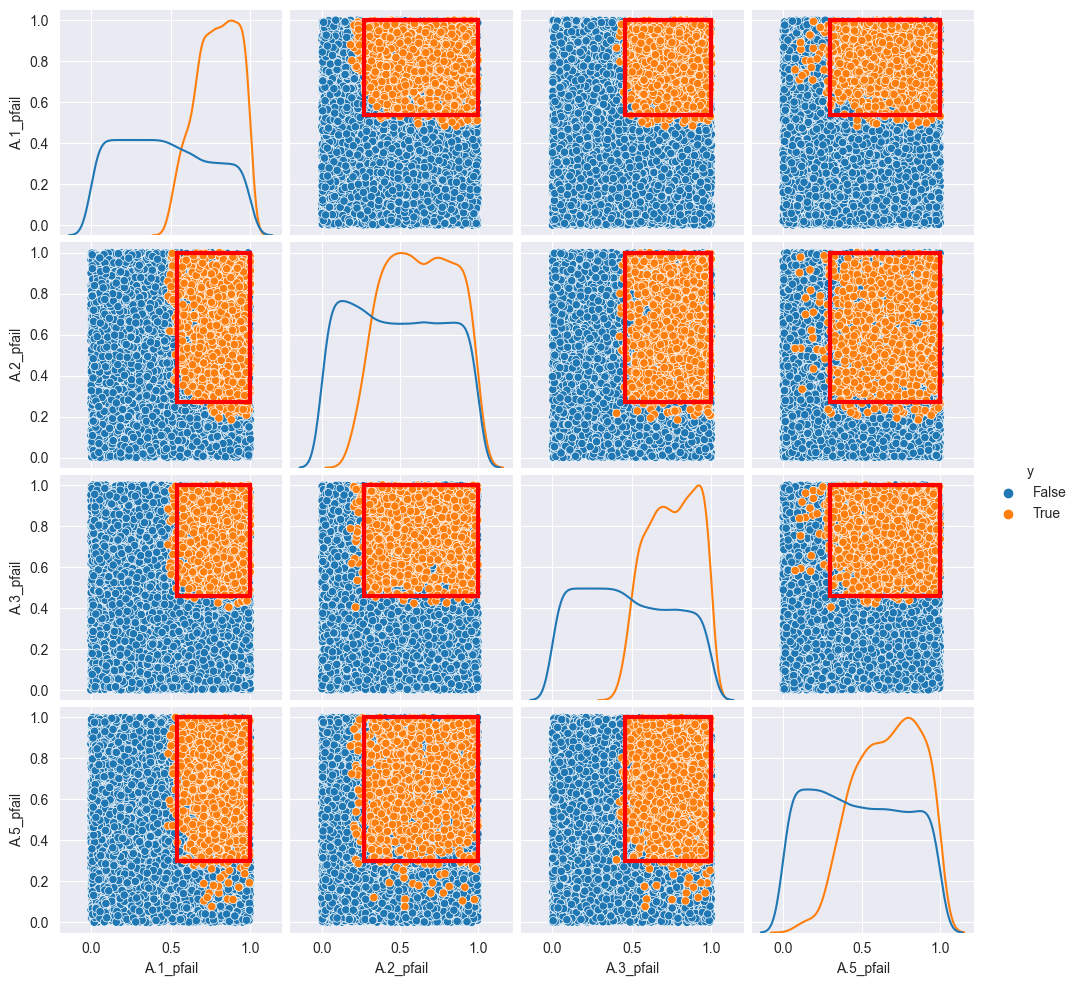

In [241]:
#NOG BEPALEN WELKE BOX WE WILLEN BEKIJKEN!
box1.inspect(40)
box1.inspect(40, style="graph")
box1.show_pairs_scatter(40)
plt.show()

# Dimensional stacking

### Expected Number of Deaths

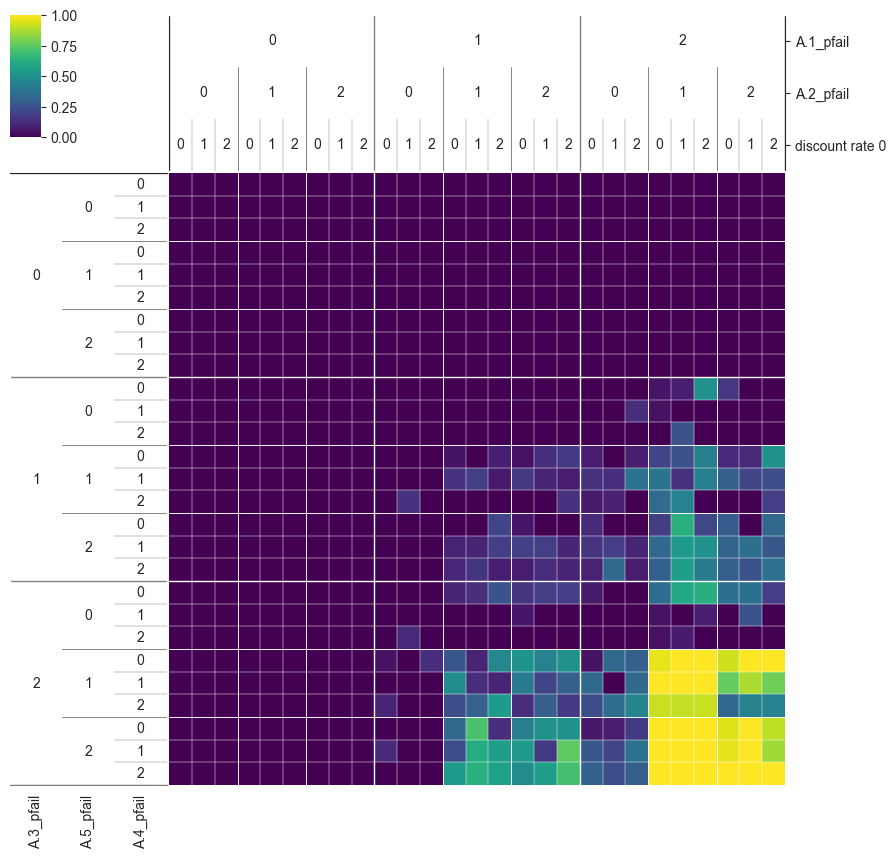

In [242]:
from ema_workbench.analysis import dimensional_stacking

x = uncertainty_experiments
y = outcomes['Expected Number of Deaths'].values < np.percentile(outcomes['Expected Number of Deaths'],10)
dimensional_stacking.create_pivot_plot(x,y)

plt.show()

### Expected Annual Damage

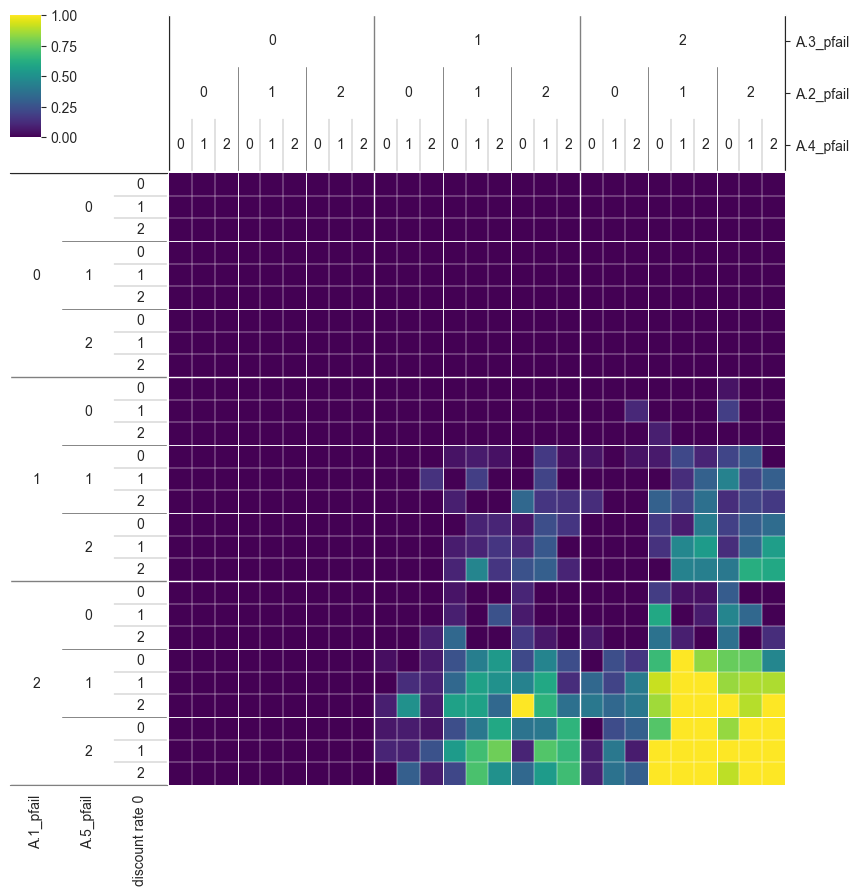

In [243]:
from ema_workbench.analysis import dimensional_stacking

x = uncertainty_experiments
y = outcomes['Expected Annual Damage'].values < np.percentile(outcomes['Expected Annual Damage'],10)
dimensional_stacking.create_pivot_plot(x,y)

plt.show()